<a href="https://colab.research.google.com/github/Jonny23Parker/Teste_Analytics_JonatasSiqueiraBitencourtCursino/blob/main/Teste_Analytics_Jonatas_Siqueira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

def gerar_dataset_vendas():
    random.seed(42)  # 42 é usado para reprodutibilidade
    num_registros = 250
    inicio_periodo = datetime(2023, 1, 1)
    fim_periodo = datetime(2023, 12, 31)


    # Criei uma lista de produtos e categorias de produtos

    produtos = ["Produto A", "Produto B", "Produto C", "Produto D", "Produto E"]
    categorias = ["Eletrônicos", "Roupas", "Alimentos", "Livros", "Móveis"]

    # Gerando os dados simulados
    data = {
        "ID": range(1, num_registros + 1),
        "Data": [inicio_periodo + timedelta(days=random.randint(0, 364)) for _ in range(num_registros)],
        "Produto": [random.choice(produtos) for _ in range(num_registros)],
        "Categoria": [random.choice(categorias) for _ in range(num_registros)],
        "Quantidade": [random.randint(1, 20) for _ in range(num_registros)],
        "Preço": [round(random.uniform(10.0, 500.0), 2) for _ in range(num_registros)]
    }

    # Criando um DataFrame
    df = pd.DataFrame(data)


    # Adiciona duplicatas e valores faltantes aleatoriamente no arquivo criado

        # a condicional usada para garantir que o código dentro so execute se variavel seja maior que 10.
    if num_registros > 10:
        # Este código seleciona 5 registros aleatórios para duplicacao
        duplicatas = df.sample(5, random_state=42)
        # Concatenar duplicatas
        df = pd.concat([df, duplicatas])
        # Preco, criar 5 valores ausentes na coluna, se menor que 5 retorna falha.
        df.loc[random.sample(range(len(df)), 5), "Preço"] = np.nan


    # redefinir o índice do DataFrame e atualizar os IDs dos registros qdo está
    # concatenando para nao ficar desorganizado/duplicado.
    df = df.reset_index(drop=True)
    df["ID"] = range(1, len(df) + 1)
    return df


def limpar_dados(df):
    # Remove os valores duplicados
    df = df.drop_duplicates()

    # Trata os valores faltantes na plnailha criada.
    df.loc[:, "Preço"] = df["Preço"].fillna(df["Preço"].mean())

    # Converte data para datetime.
    df.loc[:, "Data"] = pd.to_datetime(df["Data"])
    return df

def realizar_analises(df):
    df = df.copy()  # Cria uma cópia do DataFrame afim de  evitar possiveis modificacoes do original
    df.loc[:, "Total_Vendas"] = df["Quantidade"] * df["Preço"]
    vendas_por_produto = df.groupby("Produto", as_index=False)["Total_Vendas"].sum()
    produto_top_vendas = vendas_por_produto.loc[vendas_por_produto["Total_Vendas"].idxmax()]
    return vendas_por_produto, produto_top_vendas



# Executar o codigo completo

if __name__ == "__main__":
    # Gerar o dataset inicial juntamente com 10 registros iniciais.
    dataset = gerar_dataset_vendas()

    print("Dataset Simulado (Primeiros 10 registros):")
    print(dataset.head(10))  # para exibir 10 primeiros registros


    # Limpa os dados criados
    dataset_limpo = limpar_dados(dataset)

    # Salva o dataset apos ser limpo em um arquivo CSV que automaticamente faz download.

    from google.colab import files
    dataset_limpo.to_csv("data_clean.csv", index=False)
    files.download("data_clean.csv")


    print("\nDataset Limpo sera salvo no seu disco como 'data_clean.csv'")

    # Realizar análises solicitada e printa na tela as informacoes

    vendas_produtos, top_vendas = realizar_analises(dataset_limpo)
    print("\nTotal de vendas por produto:")
    print(vendas_produtos)
    print("\nProduto com maior número de vendas totais:")
    print(top_vendas)


Dataset Simulado (Primeiros 10 registros):
   ID       Data    Produto    Categoria  Quantidade   Preço
0   1 2023-11-24  Produto B  Eletrônicos          19  279.91
1   2 2023-02-27  Produto D    Alimentos          20  280.60
2   3 2023-01-13  Produto D       Móveis          13   55.67
3   4 2023-05-21  Produto B    Alimentos          11  496.21
4   5 2023-05-06  Produto A       Livros           1  457.34
5   6 2023-04-25  Produto A    Alimentos          16  236.11
6   7 2023-03-13  Produto D       Livros          11   67.56
7   8 2023-02-22  Produto C    Alimentos           6  417.75
8   9 2023-12-13  Produto D       Móveis          16  254.20
9  10 2023-10-07  Produto D       Roupas           7  361.14


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Dataset Limpo sera salvo no seu disco como 'data_clean.csv'

Total de vendas por produto:
     Produto  Total_Vendas
0  Produto A  167599.08488
1  Produto B  176626.57624
2  Produto C  152693.16000
3  Produto D  147699.43008
4  Produto E  126069.77000

Produto com maior número de vendas totais:
Produto            Produto B
Total_Vendas    176626.57624
Name: 1, dtype: object


--2024-11-25 04:38:09--  https://raw.githubusercontent.com/Jonny23Parker/Teste_Analytics_JonatasSiqueiraBitencourtCursino/main/data_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10970 (11K) [text/plain]
Saving to: ‘data_clean.csv’

data_clean.csv      100%[===================>]  10.71K  --.-KB/s    in 0s      

2024-11-25 04:38:09 (30.2 MB/s) - ‘data_clean.csv’ saved [10970/10970]

   ID        Data    Produto    Categoria  Quantidade   Preço
0   1  2023-11-24  Produto B  Eletrônicos          19  279.91
1   2  2023-02-27  Produto D    Alimentos          20  280.60
2   3  2023-01-13  Produto D       Móveis          13   55.67
3   4  2023-05-21  Produto B    Alimentos          11  496.21
4   5  2023-05-06  Produto A       Livros           1  457.34

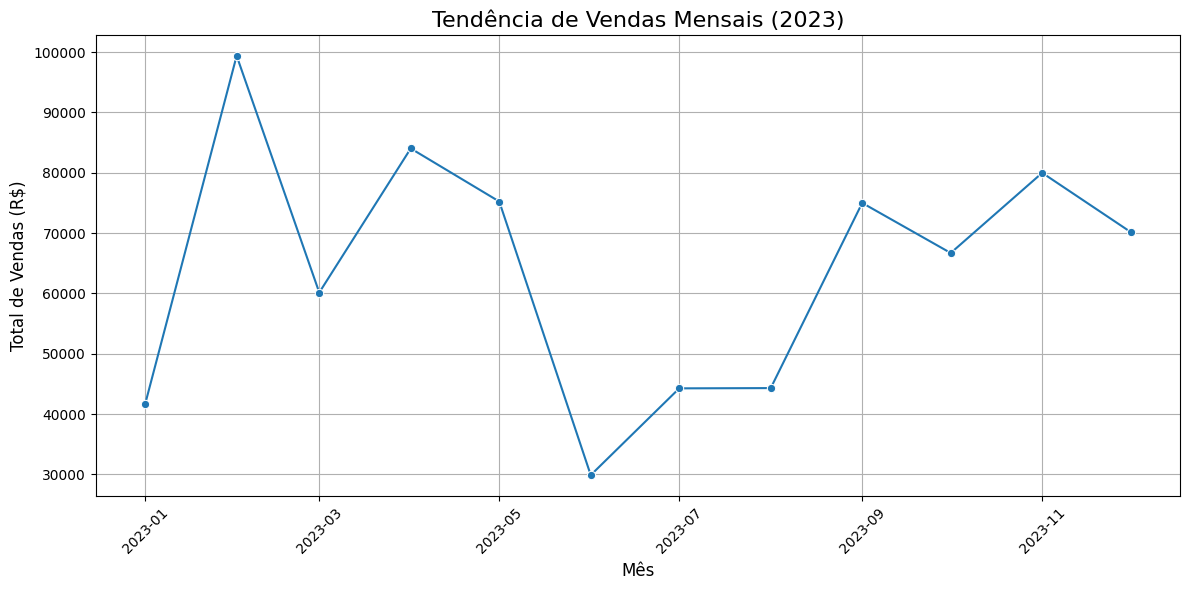

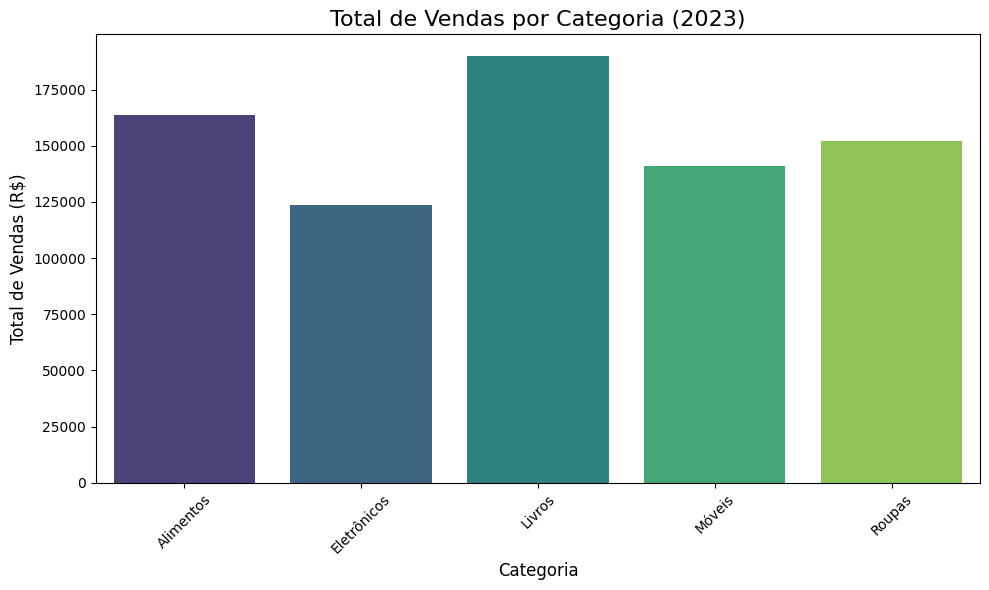

INSIGHTS OBSERVADOS:
- Tendência de Vendas: Observe o gráfico de linha, os meses de Janeiro, Junho, Julho e Aposto,
são os mais baixos em vendas, entender o que acontece nesse periodo é fundamental para redirecionar 
alguma estrategia, marketing, promocoes, campanhas, para aumentar as vendas nos periodos mais fracos.
- Categorias: A categoria Livros vem na frente com maior total de vendas, destaca o segmento mais lucrativo.
seguido pela categoria de Alimentos, Roupas, Moveis, Eletronicos, respectivamente.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Baixa o arquivo CSV do GitHub (usei meu link raw)
!wget https://raw.githubusercontent.com/Jonny23Parker/Teste_Analytics_JonatasSiqueiraBitencourtCursino/main/data_clean.csv -O data_clean.csv

# Passo 2: Carregar o dataset limpo que foi realizado previamente.
df_limpo = pd.read_csv("data_clean.csv")

# Verificar se o arquivo foi carregado direito na maquina.
print(df_limpo.head())

def analise_exploratoria(dataset):
    # Passo 3: Certifica-se de que a coluna "Data" está no tipo datetime corretamente
    dataset["Data"] = pd.to_datetime(dataset["Data"])

    # Passo 4: Criar uma coluna com o total de vendas no geral
    dataset["Total_Vendas"] = dataset["Quantidade"] * dataset["Preço"]

    # Passo 5: Agrupamento mensal para analisar a tendência de vendas ao longo do tempo
    vendas_mensais = (
        dataset.groupby(dataset["Data"].dt.to_period("M"))["Total_Vendas"]
        .sum()
        .reset_index()
    )
    vendas_mensais["Data"] = vendas_mensais["Data"].dt.to_timestamp()

    # Passo 6: Gráfico de linha: Tendência de vendas ao longo do tempo
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=vendas_mensais, x="Data", y="Total_Vendas", marker="o")
    plt.title("Tendência de Vendas Mensais (2023)", fontsize=16)
    plt.xlabel("Mês", fontsize=12)
    plt.ylabel("Total de Vendas (R$)", fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("tendencia_vendas_mensais.png")  # Salva o grafico como arquivo
    plt.show()  # Exibe o grafico salvo como arquivo

    # Passo 7: Análise por categoria que listamos
    vendas_por_categoria = dataset.groupby("Categoria")["Total_Vendas"].sum().reset_index()

    # Passo 8: Gráfico de barras: Total de vendas por categoria, 5 no total.
    plt.figure(figsize=(10, 6))
    sns.barplot(data=vendas_por_categoria, x="Categoria", y="Total_Vendas", hue="Categoria", palette="viridis", legend=False)
    plt.title("Total de Vendas por Categoria (2023)", fontsize=16)
    plt.xlabel("Categoria", fontsize=12)
    plt.ylabel("Total de Vendas (R$)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("vendas_por_categoria.png")  # Salva o gráfico como arquivo.
    plt.show()  # Exibe o grafico salvo como arquivo.

    # Passo 9: Insights que foram observados em minha visao foram.
    print("INSIGHTS OBSERVADOS:")
    print("- Tendência de Vendas: Observe o gráfico de linha, os meses de Janeiro, Junho, Julho e Aposto,")
    print("são os mais baixos em vendas, entender o que acontece nesse periodo é fundamental para redirecionar ")
    print("alguma estrategia, marketing, promocoes, campanhas, para aumentar as vendas nos periodos mais fracos.")
    print("- Categorias: A categoria Livros vem na frente com maior total de vendas, destaca o segmento mais lucrativo.")
    print("seguido pela categoria de Alimentos, Roupas, Moveis, Eletronicos, respectivamente.")
# Passo 10: Realizar a análise exploratória
analise_exploratoria(df_limpo)
